# Goals
Optimasi Campaign Results terkait produk baru, sehingga mendapatkan profit yang maksimal di bulan depan dan memahami karakteristik customers yang menerima penawaran produk baru tersebut.

# Data Quality Check
- Pertanyaan 1: Apakah ada features yang data-type nya tidak sesuai?
- Pertanyaan 2: Adakah duplicate, missing values, atau outliers? Jika ada, bagaimana cara mengatasi hal tersebut?
- Pertanyaan 3: Apakah terdapat distribusi yang tidak masuk akal?

In [893]:
%%capture
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install shap

In [894]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

In [895]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [896]:
df.shape

(2240, 28)

## Pertanyaan 1
Apakah ada features yang data-type nya tidak sesuai?

In [897]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [898]:
#Perbaikan data pada kolom Income(terdapat spasi di depan dan tipe data tidak sesuai) 
#dan Dt_Customer (tipe data tidak sesuai)
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())

    print()

ID int64
0 11191

Year_Birth int64
1893 1996

Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2

Teenhome int64
0 2

Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/1

In [899]:
#Perbaikan data pada kolom Income(terdapat spasi di depan)
df.columns = df.columns.str.replace(' ', '')

In [900]:
#Perbaikan data pada kolom Income(menghilangkan dollar dan koma menjadi tidak ada)
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')

In [901]:
#Perbaikan data pada kolom Income(mengganti tipe data object menjadi float)
df['Income'] = df['Income'].astype('float64')

In [902]:
df.Income

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [903]:
#Mengganti tipe kolom Dt_Customer menjadi Date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

## Pertanyaan 2
Adakah duplicate, missing values, atau outliers? Jika ada, bagaimana cara mengatasi hal tersebut?

### Duplicate

In [904]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

### Missing Values

In [905]:
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

<Axes: xlabel='Income'>

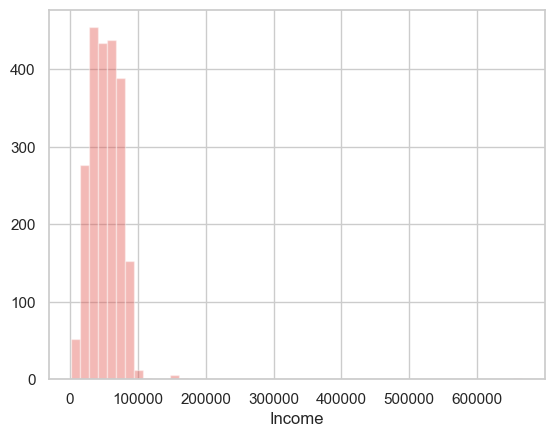

In [906]:
sns.distplot(df['Income'], kde=False, hist=True)

<Axes: >

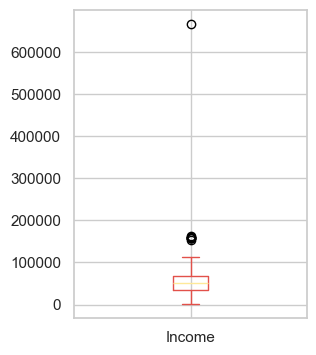

In [907]:
df['Income'].plot(kind='box', figsize=(3,4))

In [908]:
df['Income'] = df['Income'].fillna(df['Income'].median())

### Outliers

In [909]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [910]:
df_to_plot = df.select_dtypes(include=['float', 'int'])
df_to_plot.drop(columns = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                           'AcceptedCmp5', 'Response', 'Complain'],
               inplace=True)

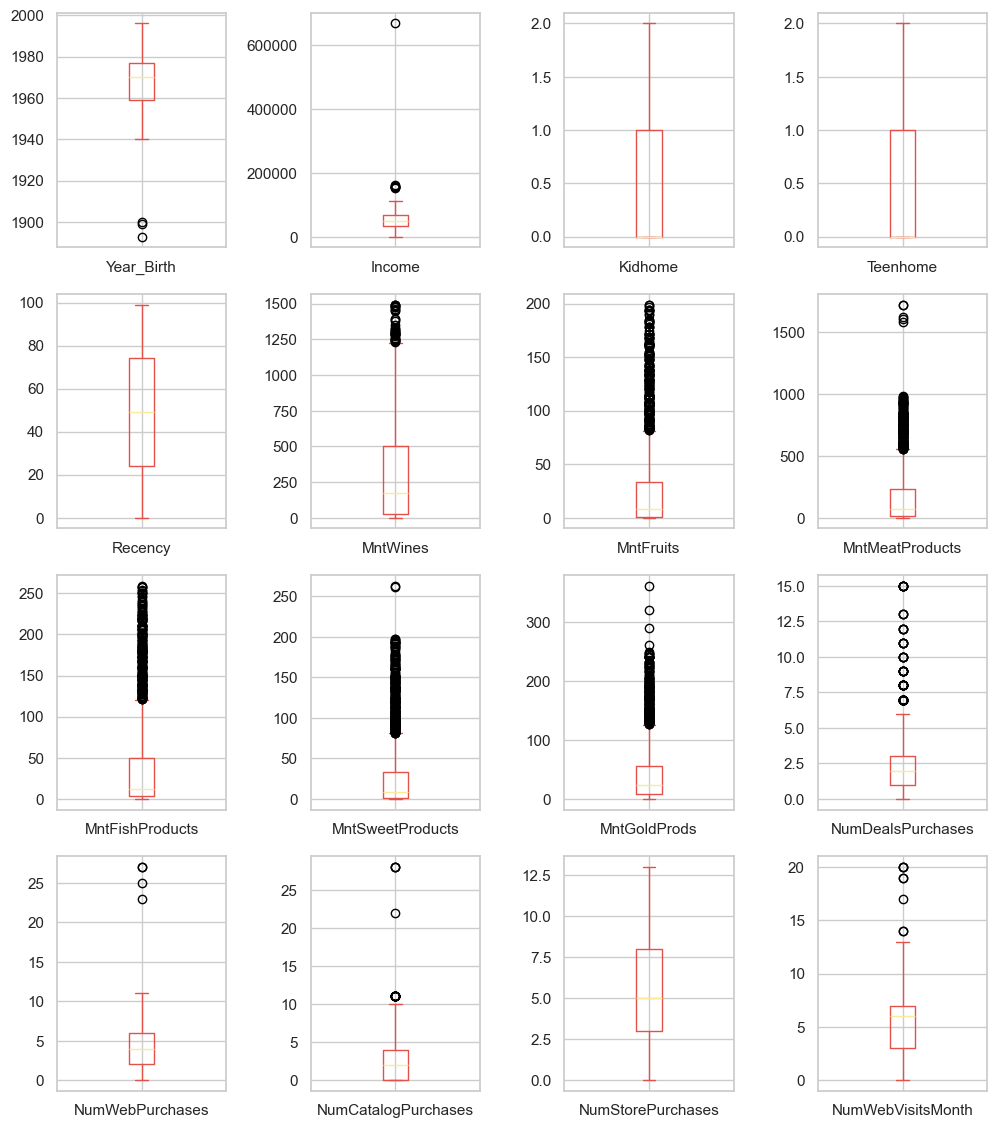

In [911]:
df_to_plot.plot(subplots=True, layout=(4, 4), kind='box', figsize=(12, 14))
plt.subplots_adjust(wspace = 0.5);

In [912]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

## Pertanyaan 3
Apakah terdapat distribusi yang tidak masuk akal?

In [913]:
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

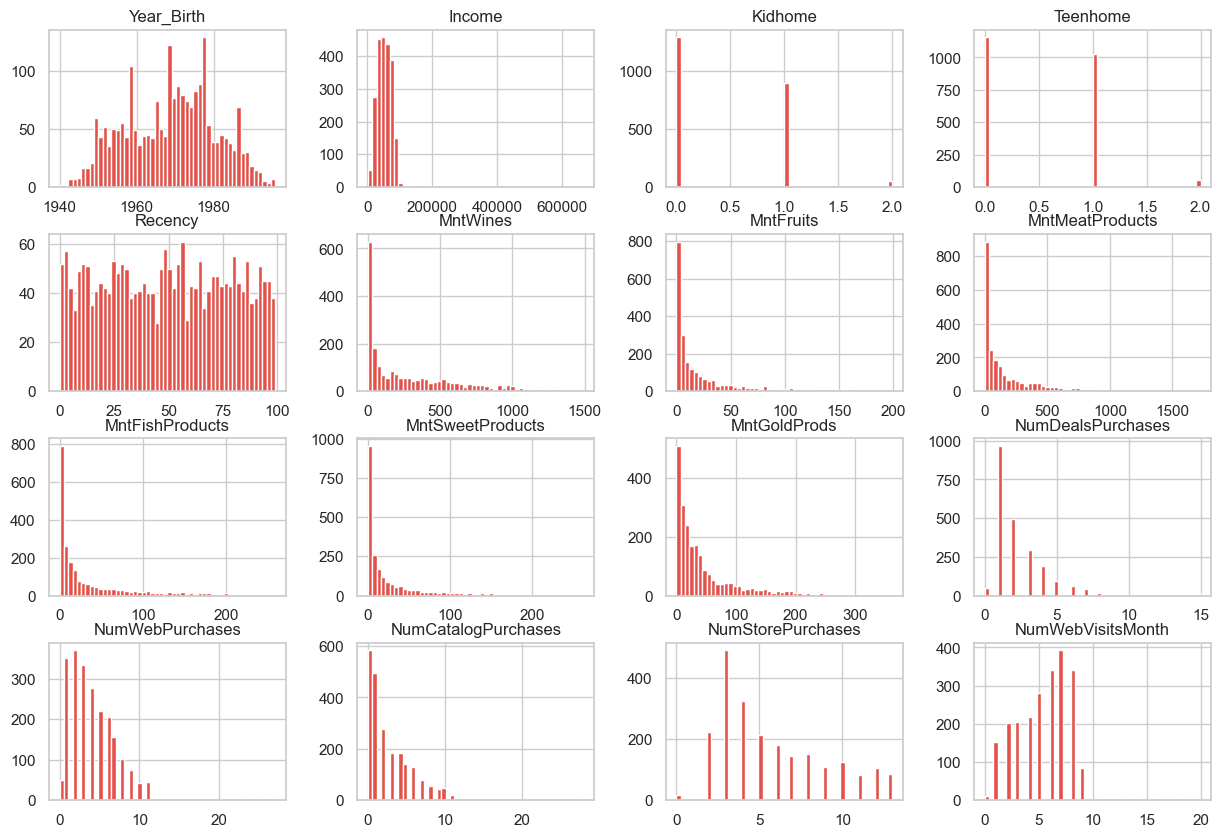

In [914]:
fig = plt.figure(figsize=(15, 10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout
plt.show()

# Data Insight

In [915]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## Year Birth

In [916]:
# Mencari umur customer pada saat mendaftar di iFood
df['Customer_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

<Axes: xlabel='Customer_Age', ylabel='Count'>

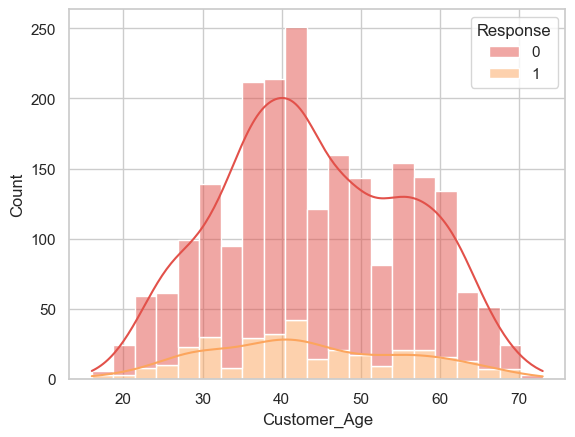

In [917]:
sns.histplot(data=df, x='Customer_Age', hue='Response', multiple='stack', kde=True)

## Education

<Axes: xlabel='Education', ylabel='Count'>

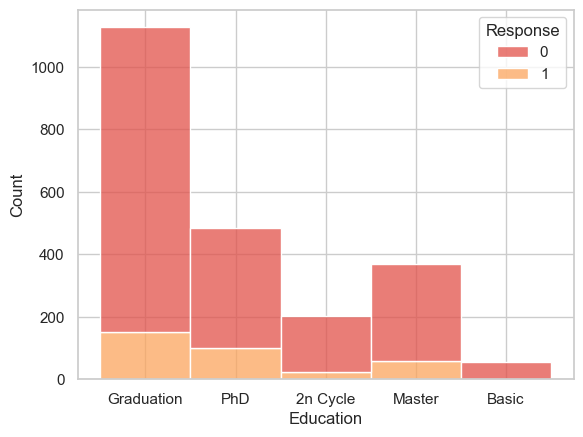

In [918]:
sns.histplot(data=df, x='Education', hue='Response', multiple='stack')

In [919]:
def barPerc(df, xVar, ax):
    # 1. How many X category
    ## check for NaN and remove
    numX = len([x for x in df[xVar].unique() if x==x])

    #2. The bar is are created in hue order, organize them
    bars = ax.patches
    ##2a. for each X variable
    for ind in range(numX):
        hueBars=bars[ind:][::numX]
        total = sum([x.get_height() for x in hueBars])

        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                   f'{bar.get_height()/total:.0%}',
                    ha="center", va="bottom")

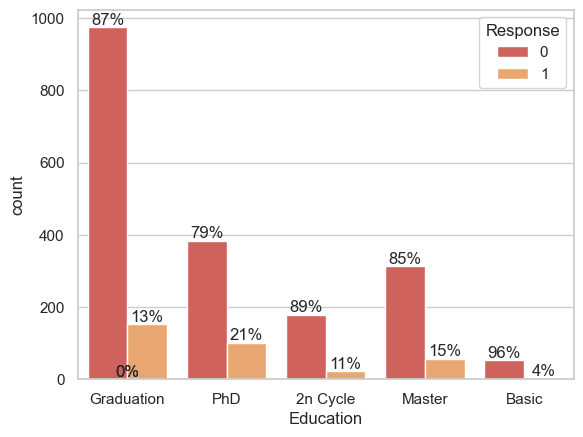

In [920]:
ax = sns.countplot(x='Education', hue='Response', data=df)
barPerc(df, 'Education', ax)

# PhD memiliki kecenderungan menerima penawaran campaign

(0.0, 175000.0)

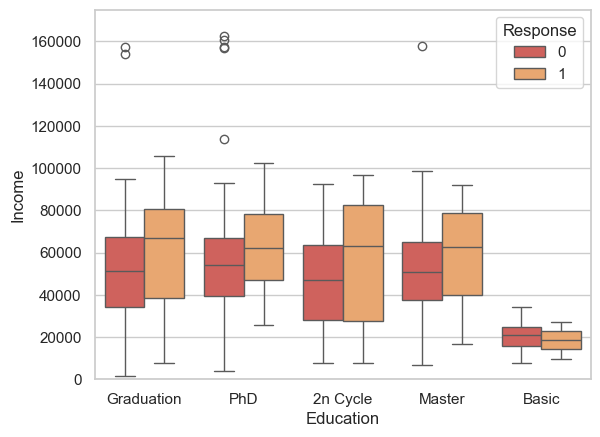

In [921]:
sns.boxplot(data=df, x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

#Orang dengan income yang lebih tinggi, cenderung menerima penawaran dari campaign

## Marital Status

In [922]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [923]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [924]:
# Buatlah status 'YOLO', 'Alone', dan 'Absurd' menjadi sama dengan 'Single'
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))

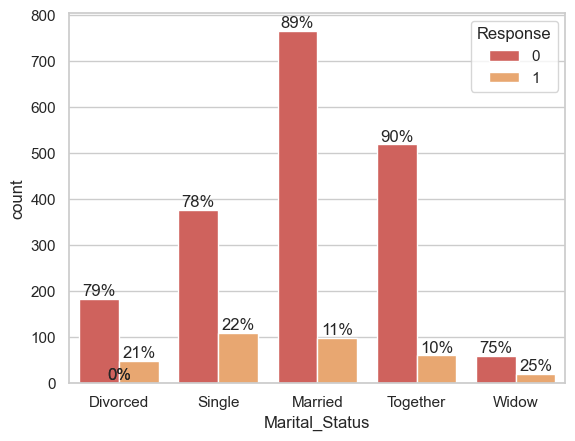

In [925]:
ax = sns.countplot(data=df, x='Marital_Status', hue='Response')
barPerc(df, 'Marital_Status', ax)

# Berdasarkan plot, ada kecenderungan customer yang tinggal sendiri mostly menerima penawaran campaign

## Kidhome + Teenhome

In [926]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [927]:
# menjumlahkan remaja dan anak kecil yang ditanggung biaya hidupnya oleh 1 customer
df['Num_Dependants'] = df['Kidhome'] + df['Teenhome']
df['Num_Dependants']

0       0
1       0
2       1
3       2
4       1
       ..
2232    1
2233    1
2234    1
2235    0
2236    2
Name: Num_Dependants, Length: 2237, dtype: int64

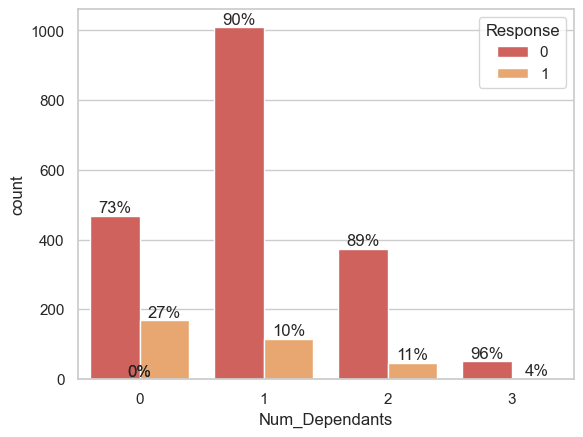

In [928]:
ax = sns.countplot(data=df, x='Num_Dependants', hue='Response')
barPerc(df, 'Num_Dependants', ax)

# Customer yang tidak memiliki anak sama sekali, cenderung menerima penawaran dari campaign

## Customer Join Date

In [929]:
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year

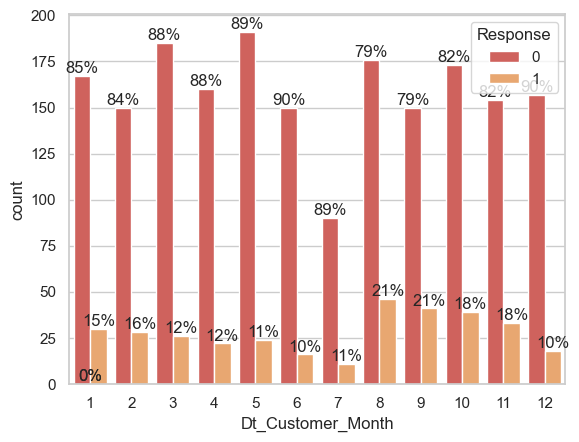

In [930]:
ax = sns.countplot(data=df, x='Dt_Customer_Month', hue='Response')
barPerc(df, 'Dt_Customer_Month', ax)

# Pada bulan ke 8 & 9, customer cenderung menerima penawaran dari campaign

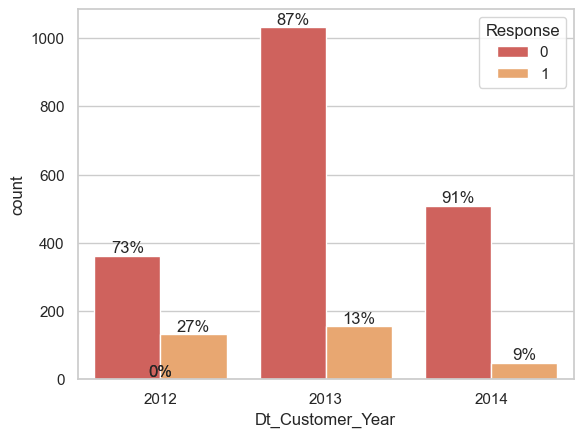

In [931]:
ax = sns.countplot(data=df, x='Dt_Customer_Year', hue='Response')
barPerc(df, 'Dt_Customer_Year', ax)

#Customer yang bergabung pada tahun 2012 (customer yang sudah lama join), cenderung menerima penawaran dari campaign

## Recency

<Axes: xlabel='Recency', ylabel='Count'>

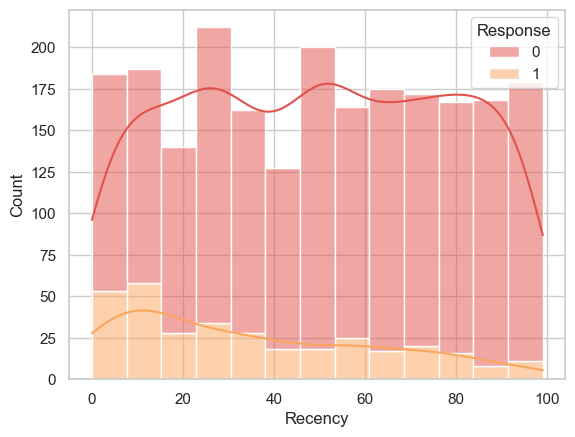

In [932]:
sns.histplot(data=df, x='Recency', hue='Response', multiple='stack', kde=True)

#Customer yang belum lama membeli, cenderung menerima penawaran dari campaign

## Income

(0.0, 230000.0)

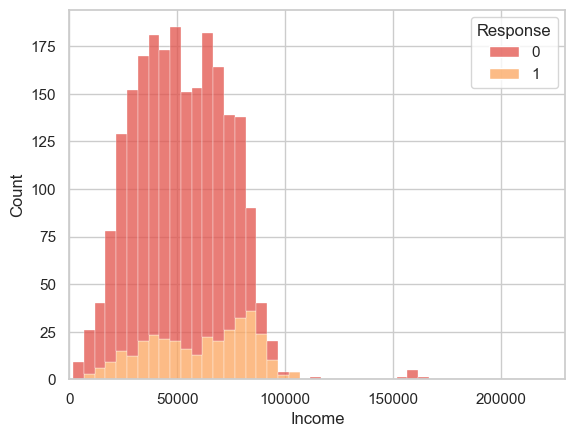

In [933]:
sns.histplot(data=df, x='Income', hue='Response', kde=False, multiple='stack')
plt.xlim(0, 230000)

## Amount Spent

In [934]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014


In [935]:
amt_spent_features = [c for c in df.columns if 'Mnt' in str(c)]
amt_spent_features.append('Response')
df[amt_spent_features]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Response
0,189,104,379,111,189,218,1
1,464,5,64,7,0,37,1
2,134,11,59,15,2,30,0
3,10,0,1,0,0,0,0
4,6,16,24,11,0,34,1
...,...,...,...,...,...,...,...
2232,372,18,126,47,48,78,0
2233,5,10,13,3,8,16,0
2234,185,2,88,15,5,14,0
2235,267,38,701,149,165,63,0


In [936]:
df[amt_spent_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


In [937]:
df['Total_Amount_Spent'] = df[amt_spent_features].sum(axis=1)

<Axes: xlabel='Total_Amount_Spent', ylabel='Count'>

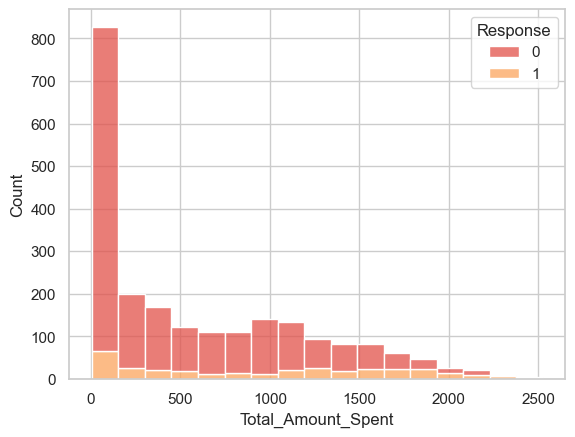

In [938]:
sns.histplot(data=df, x='Total_Amount_Spent', hue='Response', kde=False, multiple='stack')

# Jika customer spent money lebih dari $1000-2000, cenderung menerima penawaran dari campaign

## Purchases

In [939]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1191
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,578
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,92


In [940]:
purchases = [p for p in df.columns if 'Purchases' in str(p)]
purchases.append('Response')
df[purchases]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response
0,1,4,4,6,1
1,1,7,3,7,1
2,1,3,2,5,0
3,1,1,0,2,0
4,2,3,1,2,1
...,...,...,...,...,...
2232,2,5,2,11,0
2233,1,1,0,3,0
2234,2,6,1,5,0
2235,1,5,4,10,0


In [941]:
df[purchases].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


In [942]:
df['Total_Purchases'] = df[purchases].sum(axis=1)

<Axes: xlabel='Total_Purchases', ylabel='Count'>

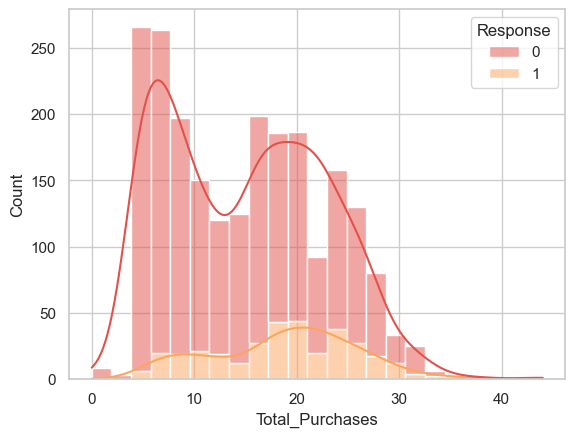

In [943]:
sns.histplot(data=df, x='Total_Purchases', hue='Response', kde=True, multiple='stack')
#Tidak ada pola unik dari data tersebut

## NumWebVisitMonth

In [944]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spent,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1191,16
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,578,19
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,92,9


In [945]:
df[['NumWebVisitsMonth', 'Response']].corr()[['Response']]

#Tidak memiliki korelasi terhadap response

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


## Previous Campaign

In [946]:
prev_cmp = [c for c in df.columns if 'AcceptedCmp' in str(c)]
prev_cmp.append('Response')
df[prev_cmp]

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,0,0,0,0,0,1
1,0,0,0,0,1,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,1
...,...,...,...,...,...,...
2232,0,0,0,0,0,0
2233,0,0,0,0,0,0
2234,0,0,0,0,0,0
2235,0,0,0,0,0,0


In [947]:
df[prev_cmp].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


In [948]:
df['Total_Campaign_Response'] = df[prev_cmp].sum(axis=1)
df['Total_Campaign_Response']

0       1
1       2
2       0
3       0
4       2
       ..
2232    0
2233    0
2234    0
2235    0
2236    3
Name: Total_Campaign_Response, Length: 2237, dtype: int64

<Axes: xlabel='Total_Campaign_Response', ylabel='Count'>

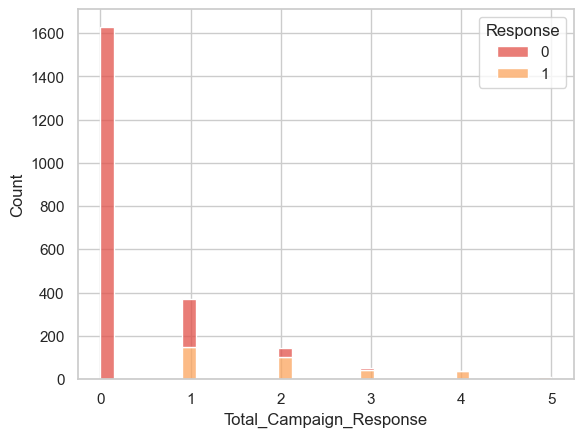

In [949]:
sns.histplot(data=df, x='Total_Campaign_Response', hue='Response', multiple='stack')

## Complain

In [950]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spent,Total_Purchases,Total_Campaign_Response
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1191,16,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,578,19,2
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251,11,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11,4,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,92,9,2


In [951]:
df[['Complain', 'Response']].corr()[['Response']]

#Tidak ada korelasi terhadap Response

,Response
Complain,0.000185
Response,1.000000


## Country

In [952]:
df['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

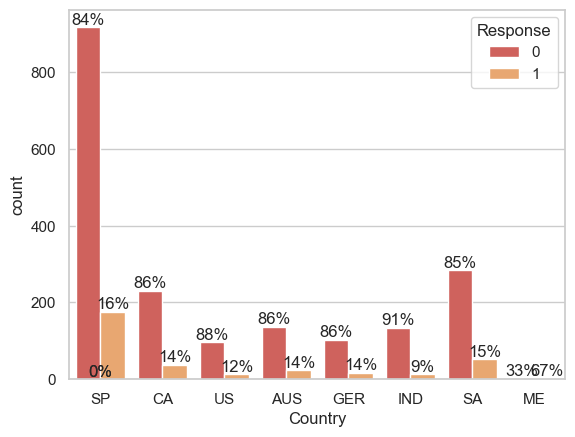

In [953]:
ax = sns.countplot(data=df, x='Country', hue='Response')
barPerc(df, 'Country', ax)

# (ME) Mexico dan (SP) Spain merupakan negara yang paling cenderung menerima penawaran dari campaign

# Modelling

## Data Splitting
- Data Train = 60%
- Data Validation = 20%
- Data Test = 20%

In [954]:
df = pd.read_csv('marketing_data.csv')
df.shape

(2240, 28)

In [955]:
from sklearn.model_selection import train_test_split

In [956]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [957]:
df_train.shape, df_valid.shape, df_test.shape

((1344, 28), (448, 28), (448, 28))

In [958]:
1344/2240, 448/2240, 448/2240

(0.6, 0.2, 0.2)

# Preprocessing

## Numeric Preprocessing

In [959]:
df_train.columns = df_train.columns.str.replace(' ', '')
df_train['Income'] = df_train['Income'].str.replace('$', '')
df_train['Income'] = df_train['Income'].str.replace(',', '')
df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'])
df_train['Income'] = df_train['Income'].astype('float')

In [960]:
df_valid.columns = df_valid.columns.str.replace(' ', '')
df_valid['Income'] = df_valid['Income'].str.replace('$', '')
df_valid['Income'] = df_valid['Income'].str.replace(',', '')
df_valid['Dt_Customer'] = pd.to_datetime(df_valid['Dt_Customer'])
df_valid['Income'] = df_valid['Income'].astype(float)

In [961]:
df_test.columns = df_test.columns.str.replace(' ', '')
df_test['Income'] = df_test['Income'].str.replace('$', '')
df_test['Income'] = df_test['Income'].str.replace(',', '')
df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])
df_test['Income'] = df_test['Income'].astype(float)

In [962]:
df_train['Income'] = df_train['Income'].fillna(df_train['Income'].median())
df_valid['Income'] = df_valid['Income'].fillna(df_valid['Income'].median())
df_test['Income'] = df_test['Income'].fillna(df_test['Income'].median())

In [963]:
df_train = df_train[df_train['Year_Birth'] > 1900].reset_index(drop=True)
df_valid = df_valid[df_valid['Year_Birth'] > 1900].reset_index(drop=True)
df_test = df_test[df_test['Year_Birth'] > 1900].reset_index(drop=True)

In [964]:
df_train['Customer_Age'] = df_train['Dt_Customer'].dt.year - df_train['Year_Birth']
df_valid['Customer_Age'] = df_valid['Dt_Customer'].dt.year - df_valid['Year_Birth']
df_test['Customer_Age'] = df_test['Dt_Customer'].dt.year - df_test['Year_Birth']

In [965]:
df_train['Marital_Status'] = df_train['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))
df_valid['Marital_Status'] = df_valid['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))
df_test['Marital_Status'] = df_test['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))

In [966]:
df_train['Num_Dependants'] = df_train['Kidhome'] + df_train['Teenhome']
df_valid['Num_Dependants'] = df_valid['Kidhome'] + df_valid['Teenhome']
df_test['Num_Dependants'] = df_test['Kidhome'] + df_test['Teenhome']

In [967]:
df_train['Dt_Customer_Year'] = df_train['Dt_Customer'].dt.year
df_train['Dt_Customer_Month'] = df_train['Dt_Customer'].dt.month

df_valid['Dt_Customer_Year'] = df_valid['Dt_Customer'].dt.year
df_valid['Dt_Customer_Month'] = df_valid['Dt_Customer'].dt.month

df_test['Dt_Customer_Year'] = df_test['Dt_Customer'].dt.year
df_test['Dt_Customer_Month'] = df_test['Dt_Customer'].dt.month

In [968]:
amt_spent_features = [c for c in df.columns if 'Mnt' in str(c)]
df_train['Total_Amount_Spent'] = df_train[amt_spent_features].sum(axis=1)
df_valid['Total_Amount_Spent'] = df_valid[amt_spent_features].sum(axis=1)
df_test['Total_Amount_Spent'] = df_test[amt_spent_features].sum(axis=1)

In [969]:
purchases = [p for p in df.columns if 'Purchases' in str(p)]
df_train['Total_Purchases'] = df_train[purchases].sum(axis=1)
df_valid['Total_Purchases'] = df_valid[purchases].sum(axis=1)
df_test['Total_Purchases'] = df_test[purchases].sum(axis=1)

In [970]:
display(df_train.head())
print()
display(df_valid.head())
print()
display(df_test.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Year,Dt_Customer_Month,Total_Amount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,2014,4,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,2012,11,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,2013,12,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,2012,9,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,2013,3,81,5


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Year,Dt_Customer_Month,Total_Amount_Spent,Total_Purchases
0,7143,1955,2n Cycle,Together,74805.0,0,1,2013-11-06,14,209,162,209,41,162,37,5,4,7,10,2,0,0,0,0,0,0,0,SP,58,1,2013,11,820,26
1,6383,1971,PhD,Together,32892.0,1,0,2014-05-25,78,26,0,15,2,1,2,2,3,0,3,8,0,0,0,0,0,0,0,SA,43,1,2014,5,46,8
2,2853,1980,Graduation,Single,51766.0,1,0,2014-03-11,74,60,51,87,6,20,51,2,4,2,4,5,0,0,0,0,0,0,0,CA,34,1,2014,3,275,12
3,5393,1977,Graduation,Single,23763.0,1,0,2012-08-07,64,22,0,6,6,2,6,1,1,0,3,7,0,0,0,0,0,0,0,SP,35,1,2012,8,42,5
4,1340,1986,Graduation,Married,92910.0,0,0,2014-04-24,42,551,137,792,179,103,33,1,6,7,13,1,0,1,1,1,0,0,0,SP,28,0,2014,4,1795,27


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Year,Dt_Customer_Month,Total_Amount_Spent,Total_Purchases
0,9204,1970,Graduation,Widow,66731.0,0,1,2012-09-12,33,371,159,194,58,106,141,4,4,3,6,3,0,0,0,0,0,0,0,SP,42,1,2012,9,1029,17
1,1459,1966,PhD,Married,69063.0,0,1,2012-11-07,16,666,35,124,69,8,26,1,5,3,5,3,0,0,0,0,0,0,0,SP,46,1,2012,11,928,14
2,4971,1962,PhD,Together,31497.0,0,1,2012-12-06,22,108,1,28,13,1,4,2,3,1,4,8,0,0,0,0,0,0,0,SA,50,1,2012,12,155,10
3,3635,1962,PhD,Single,52597.0,0,1,2014-05-07,69,492,0,37,7,0,42,3,6,3,8,5,0,0,0,0,0,0,0,SA,52,1,2014,5,578,20
4,4769,1977,Master,Together,57954.0,1,1,2014-06-18,52,456,4,24,0,0,9,7,8,2,6,7,0,1,0,0,0,0,0,SP,37,2,2014,6,493,23


In [971]:
cmp_feature = [c for c in df.columns if 'AcceptedCmp' in str(c)]
amt_feature = [c for c in df.columns if 'Mnt' in str(c)]
num_feature = [c for c in df.columns if 'Num' in str(c)]

In [972]:
numeric_feature = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Customer_Age',
                  'Num_Dependants', 'Dt_Customer_Year', 'Dt_Customer_Month', 'Total_Amount_Spent', 
                   'Total_Purchases']

In [973]:
all_numeric_feature = cmp_feature + amt_feature + num_feature + numeric_feature

In [974]:
display(df_train[all_numeric_feature].head())
display(df_valid[all_numeric_feature].head())
display(df_test[all_numeric_feature].head())

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Year,Dt_Customer_Month,Total_Amount_Spent,Total_Purchases
0,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,2014,4,1230,19
1,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,2012,11,1464,23
2,0,0,0,0,0,19,7,19,0,1,24,1,2,1,2,7,38961.0,1,0,60,0,40,1,2013,12,70,6
3,0,0,0,0,0,739,107,309,140,80,35,1,2,5,13,6,76445.0,1,0,2,0,41,1,2012,9,1410,21
4,1,0,0,0,0,3,9,15,13,2,39,1,1,1,2,9,22585.0,0,0,23,0,43,0,2013,3,81,5


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Year,Dt_Customer_Month,Total_Amount_Spent,Total_Purchases
0,0,0,0,0,0,209,162,209,41,162,37,5,4,7,10,2,74805.0,0,1,14,0,58,1,2013,11,820,26
1,0,0,0,0,0,26,0,15,2,1,2,2,3,0,3,8,32892.0,1,0,78,0,43,1,2014,5,46,8
2,0,0,0,0,0,60,51,87,6,20,51,2,4,2,4,5,51766.0,1,0,74,0,34,1,2014,3,275,12
3,0,0,0,0,0,22,0,6,6,2,6,1,1,0,3,7,23763.0,1,0,64,0,35,1,2012,8,42,5
4,0,1,1,1,0,551,137,792,179,103,33,1,6,7,13,1,92910.0,0,0,42,0,28,0,2014,4,1795,27


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Year,Dt_Customer_Month,Total_Amount_Spent,Total_Purchases
0,0,0,0,0,0,371,159,194,58,106,141,4,4,3,6,3,66731.0,0,1,33,0,42,1,2012,9,1029,17
1,0,0,0,0,0,666,35,124,69,8,26,1,5,3,5,3,69063.0,0,1,16,0,46,1,2012,11,928,14
2,0,0,0,0,0,108,1,28,13,1,4,2,3,1,4,8,31497.0,0,1,22,0,50,1,2012,12,155,10
3,0,0,0,0,0,492,0,37,7,0,42,3,6,3,8,5,52597.0,0,1,69,0,52,1,2014,5,578,20
4,0,1,0,0,0,456,4,24,0,0,9,7,8,2,6,7,57954.0,1,1,52,0,37,2,2014,6,493,23


## Categorical Preprocessing

In [975]:
df_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Year,Dt_Customer_Month,Total_Amount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,2014,4,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,2012,11,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,2013,12,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,2012,9,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,2013,3,81,5


In [976]:
categoric_feature = ['Education', 'Marital_Status', 'Country']

In [977]:
all_feature = categoric_feature + all_numeric_feature

In [978]:
df_train_final = df_train[all_feature]
df_valid_final = df_valid[all_feature]
df_test_final = df_test[all_feature]

### Categoric:
- Education (ordinal)
- Marital_Status (nominal)
- Country (nominal)

In [979]:
df_train_final.Education.unique()

array(['PhD', 'Graduation', 'Master', '2n Cycle', 'Basic'], dtype=object)

In [980]:
education = {'Basic':1, 'Graduation':2, '2n Cycle':3, 'Master':4, 'PhD':5}

In [981]:
df_train_final['Education'] = df_train_final['Education'].map(education)
df_valid_final['Education'] = df_valid_final['Education'].map(education)
df_test_final['Education'] = df_test_final['Education'].map(education)

In [982]:
df_train_final.head()

,Education,Marital_Status,Country,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Year,Dt_Customer_Month,Total_Amount_Spent,Total_Purchases
0,5,Single,CA,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,2014,4,1230,19
1,2,Married,SP,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,2012,11,1464,23
2,4,Married,SP,0,0,0,0,0,19,7,19,0,1,24,1,2,1,2,7,38961.0,1,0,60,0,40,1,2013,12,70,6
3,2,Married,SA,0,0,0,0,0,739,107,309,140,80,35,1,2,5,13,6,76445.0,1,0,2,0,41,1,2012,9,1410,21
4,2,Single,SP,1,0,0,0,0,3,9,15,13,2,39,1,1,1,2,9,22585.0,0,0,23,0,43,0,2013,3,81,5


In [983]:
from sklearn.feature_extraction import DictVectorizer

In [984]:
dv = DictVectorizer(sparse=False)

In [985]:
df_train_final_dicts = df_train_final.to_dict(orient='records')
df_valid_final_dicts = df_valid_final.to_dict(orient='records')
df_test_final_dicts = df_test_final.to_dict(orient='records')

In [986]:
df_train_final_dicts = dv.fit_transform(df_train_final_dicts)

In [987]:
df_valid_final_dicts = dv.transform(df_valid_final_dicts)
df_test_final_dicts = dv.transform(df_test_final_dicts)

In [988]:
df_train_final_dicts

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.230e+03,
        1.900e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.464e+03,
        2.300e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 7.000e+01,
        6.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 4.400e+01,
        1.000e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.241e+03,
        2.100e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.100e+01,
        4.000e+00]])

In [989]:
df_train_final = pd.DataFrame(df_train_final_dicts, columns = dv.get_feature_names_out())

In [990]:
df_valid_final = pd.DataFrame(df_valid_final_dicts, columns = dv.get_feature_names_out())
df_test_final = pd.DataFrame(df_test_final_dicts, columns = dv.get_feature_names_out())

In [991]:
x_train_final = df_train_final
x_valid_final = df_valid_final
x_test_final = df_test_final

In [992]:
y_train_final = df_train.Response
y_valid_final = df_valid.Response
y_test_final = df_test.Response

## Base Model

### Logistic Regression

In [993]:
from sklearn.linear_model import LogisticRegression

In [994]:
from sklearn.metrics import roc_auc_score

In [995]:
model = LogisticRegression(random_state=42)
model.fit(x_train_final, y_train_final)

LogisticRegression(random_state=42)

In [996]:
y_valid_pred = model.predict_proba(x_valid_final)[:,1]

In [997]:
print("LogisticRegression ROCAUC Result: " , roc_auc_score(y_valid_final, y_valid_pred).round(3))

LogisticRegression ROCAUC Result:  0.747


### Random Forest

In [998]:
from sklearn.ensemble import RandomForestClassifier

In [999]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [1000]:
y_valid_pred = model.predict_proba(x_valid_final)[:,1]

In [1001]:
print("RandomForestClassifier ROCAUC Result", roc_auc_score(y_valid_final, y_valid_pred).round(3))

RandomForestClassifier ROCAUC Result 0.885


### Performance Stability Check

In [1002]:
x_full_train_final = pd.concat([x_train_final, x_valid_final])
y_full_train_final = pd.concat([y_train_final, y_valid_final])

In [1003]:
model = RandomForestClassifier(random_state=42)
model.fit(x_full_train_final, y_full_train_final)

RandomForestClassifier(random_state=42)

In [1004]:
y_test_pred = model.predict_proba(x_test_final)[:,1]

In [1005]:
print("RandomForestClassifier ROCAUC Result: ", roc_auc_score(y_test_final, y_test_pred).round(3))

RandomForestClassifier ROCAUC Result:  0.869


## Interpretation

In [1006]:
import shap

In [1007]:
#menghitung shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test_final)

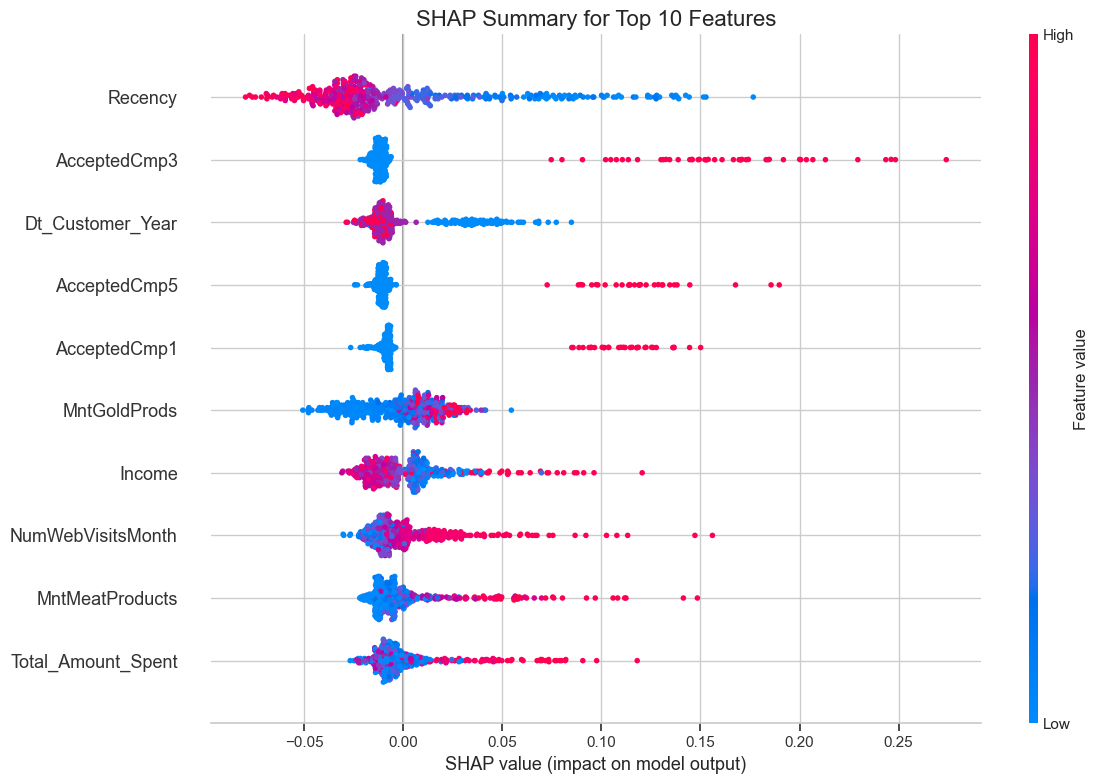

In [1008]:
#membuat plot
plt.title("SHAP Summary for Top 10 Features", size=16)
shap.summary_plot(shap_values[1], x_test_final, max_display=10, plot_size=(12,8))

## Most Succesfull product

In [1025]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [1020]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [1022]:
sold_product = [df[product].sum() for product in products]
sold_product

[680816, 58917, 373968, 84057, 60621, 98609]

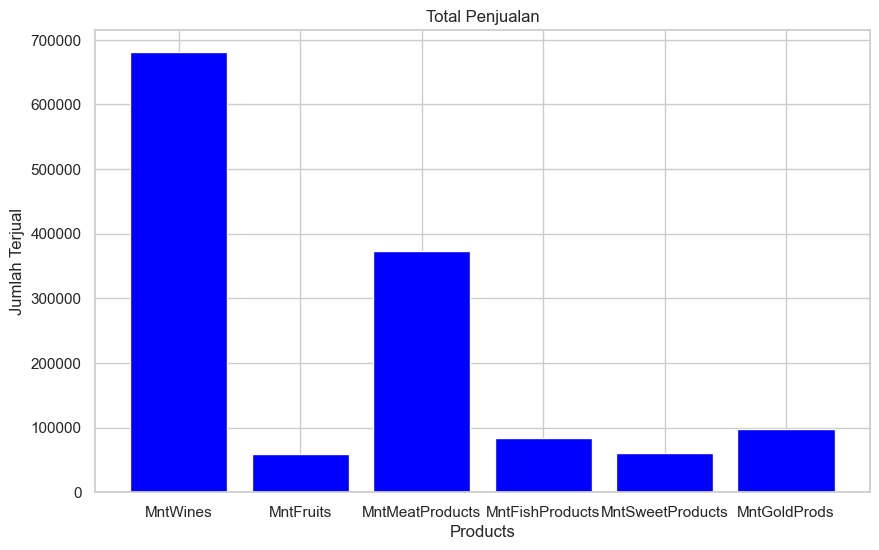

In [1024]:
# Membuat plot
plt.figure(figsize=(10, 6))
plt.bar(products, sold_product, color='blue')
plt.xlabel('Products')
plt.ylabel('Jumlah Terjual')
plt.title('Total Penjualan')
plt.show()

#Maka bisa diambil kesimpulan bahwa, produk yang paling sukses terjual yaitu wines

## Country have success rate campaign

In [1028]:
#List negara yang ada
countries = df['Country'].unique()
countries

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [1033]:
# Menambahkan kolom baru 'TotalSpending' yang berisi jumlah total pengeluaran per baris
df['total_spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [1036]:
country_totals = df.groupby('Country')['total_spending'].mean()

In [1037]:
# Mengurutkan nilai secara descending untuk mengetahui negara dengan total pengeluaran tertinggi
sorted_countries = country_totals.sort_values(ascending=False)

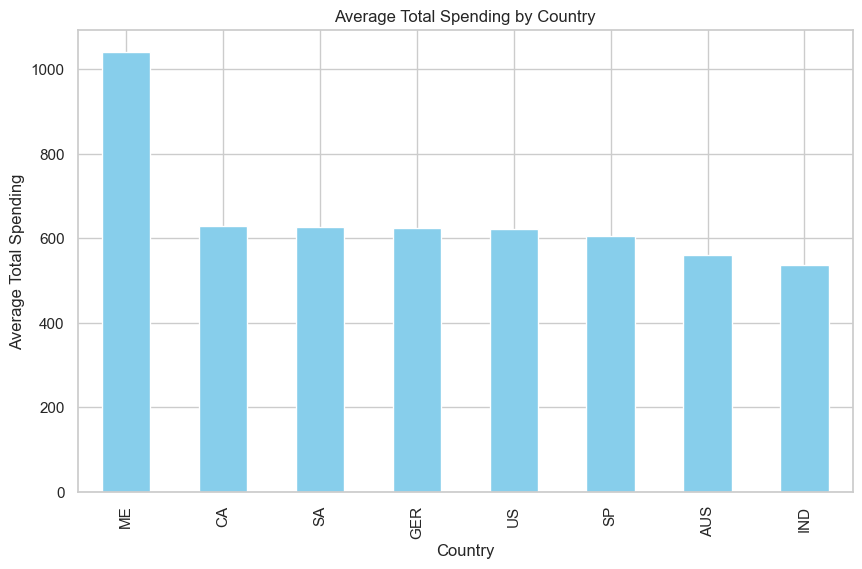

In [1038]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sorted_countries.plot(kind='bar', color='skyblue')
plt.title('Average Total Spending by Country')
plt.xlabel('Country')
plt.ylabel('Average Total Spending')
plt.show()